In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

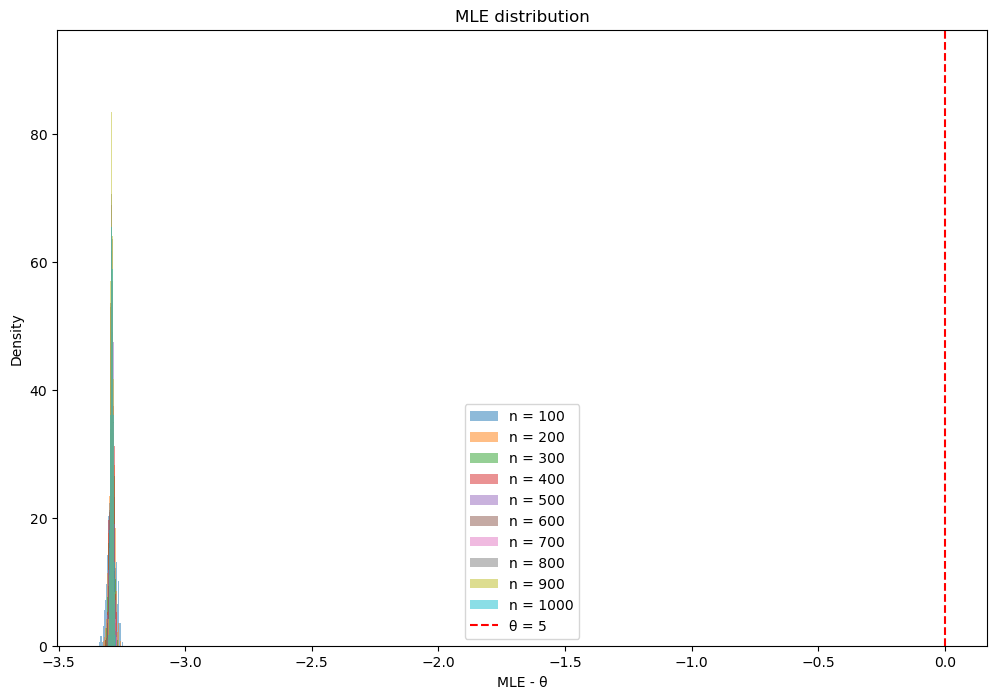

Bias: [-3.29015155 -3.28985509 -3.28987354 -3.28994373 -3.28988926 -3.29054468
 -3.29015268 -3.29032702 -3.29009436 -3.29002531]
Variance: [2.46745475e-04 1.26810569e-04 8.47669523e-05 6.53668819e-05
 5.20874949e-05 4.15143668e-05 3.64210211e-05 3.27660614e-05
 2.69938502e-05 2.55386578e-05]
MSE: [10.82534396 10.82327329 10.82335269 10.82379512 10.82342343 10.82772578
 10.82514105 10.82628467 10.82474792 10.82429207]
Out of threshold: [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Задаем распределение и функцию логираспределения.
def f_theta(x, theta):
    return (3 * x**2 / np.sqrt(2 * np.pi)) * np.exp(-((theta - x**3)**2) / 2)

def log_likelihood(x, theta):
    return np.sum(np.log(f_theta(x, theta)))

# Задаем функцию для поиска максимальной оценки правдоподобия параметра 𝜃.
def mle(x):
    return np.cbrt(np.mean(x**3))

# Задает параметры эксперимента: объемы выборки, количество выборок для каждого объема выборки и порог для оценки отличия от реального параметра.
theta = 5
n_list = [i * 100 for i in range(1,11)]
m = 1000
threshold = 0.5

# Задает массивы для хранения результатов.
mle_results = np.zeros((len(n_list), m))
bias_results = np.zeros(len(n_list))
variance_results = np.zeros(len(n_list))
mse_results = np.zeros(len(n_list))
out_of_threshold = np.zeros(len(n_list))

# Проводит эксперимент для каждого объема выборки: генерирует выборку, считает оценку параметра, считает выборочные характеристики.
for i, n in enumerate(n_list):
    for j in range(m):
        # Генерируем выборку.
        u = np.random.uniform(0, 1, n)
        x = np.cbrt(np.sqrt(2) * stats.norm.ppf(u) + theta)

        # Считаем оценку параметра.
        mle_results[i, j] = mle(x)

    # Считает выборочные характеристики.
    bias_results[i] = np.mean(mle_results[i, :]) - theta
    variance_results[i] = np.var(mle_results[i, :])
    mse_results[i] = np.mean((mle_results[i, :] - theta)**2)
    out_of_threshold[i] = np.sum(np.abs(mle_results[i, :] - theta) > threshold)

# Визуализирует результаты: строит гистограммы распределения оценок и выводит в консоль значения смещения, дисперсии, среднеквадратичной ошибки и количества выборок, для которых оценка отличается от реального параметра более чем на заданный порог.
plt.figure(figsize=(12, 8))
for i, n in enumerate(n_list):
    plt.hist(mle_results[i, :] - theta, bins=50, density=True, alpha=0.5, label=f"n = {n}")
plt.axvline(0, color="red", linestyle="--", label=f"θ = {theta}")
plt.legend()
plt.xlabel("MLE - θ")
plt.ylabel("Density")
plt.title("MLE distribution")
plt.show()

print("Bias:", bias_results)
print("Variance:", variance_results)
print("MSE:", mse_results)
print("Out of threshold:", out_of_threshold)
